<a href="https://colab.research.google.com/github/Rajmulik511/AspireNex_DataScience_Assignments/blob/main/AspireNex_Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Data Collection and processing**

In [4]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Rows and Columns in Data

In [5]:
data.shape

(418, 12)

Data Types in Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Null Count in Data

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Remove Cabin columns as it contains Most null vales
error='ignores' repetation cause Key Error

In [8]:
data.drop(columns=['Cabin'],axis=1,inplace=True, errors='ignore')


In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Fill Missing Values in Age Col. with Mean Age Value

In [10]:
data["Age"].mean()

30.272590361445783

In [11]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

Filling Missing in Fare Col. using Mode value

In [13]:
data['Fare'].mean()

35.627188489208635

In [14]:
data['Fare'].fillna(data['Fare'].mean(),inplace=True)

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Visualization

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

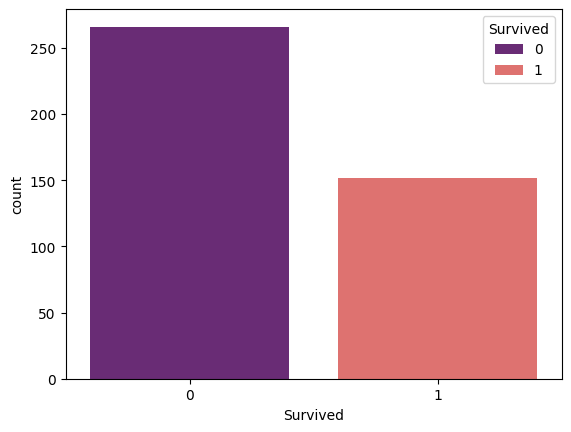

In [22]:
sns.countplot(x='Survived',data=data, hue='Survived', palette='magma')

<ipython-input-30-a9dd5844cdb1>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Survived', 'Did Not Survive'])


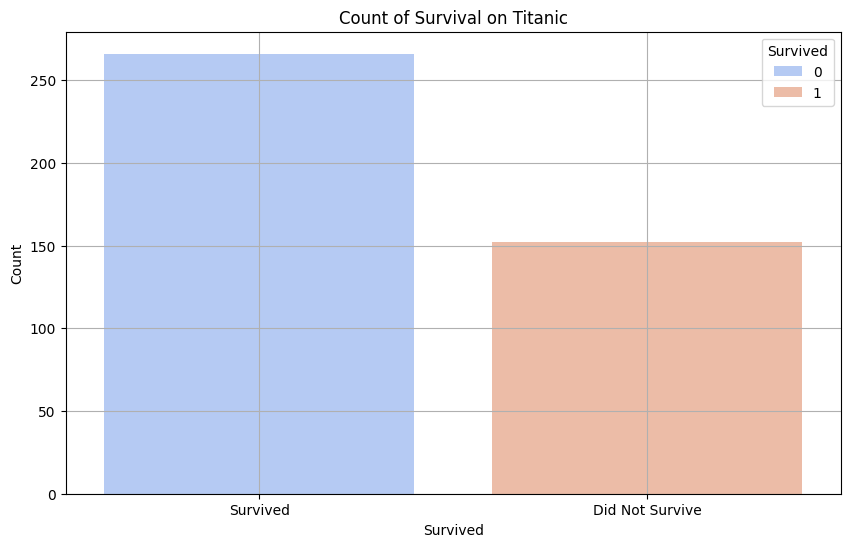

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Survived', data=data, hue='Survived', palette='coolwarm', order=[0, 1])
ax.set_xlabel('Survived')
ax.set_ylabel('Count')
ax.set_title('Count of Survival on Titanic')
ax.set_xticklabels(['Survived', 'Did Not Survive'])
#ax.legend(title='Survived')
plt.grid(True)
# for container in ax.containers:
#     ax.bar_label(container, fmt='%d')
# plt.show()

Text(0.5, 1.0, 'Count of Male and Female')

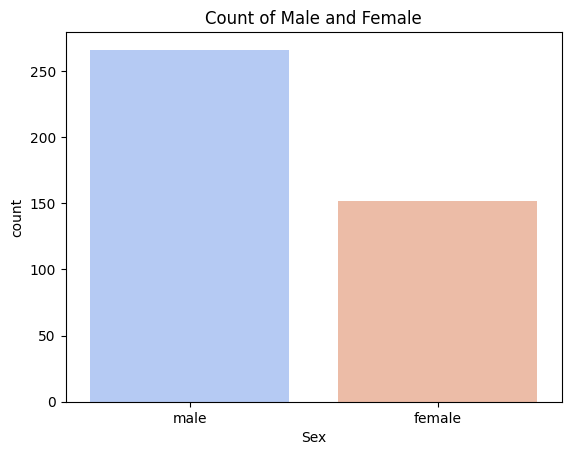

In [36]:
ay= sns.countplot(x='Sex',data= data,hue='Sex',palette='coolwarm')
ay.set_title('Count of Male and Female')

<Axes: xlabel='Pclass', ylabel='count'>

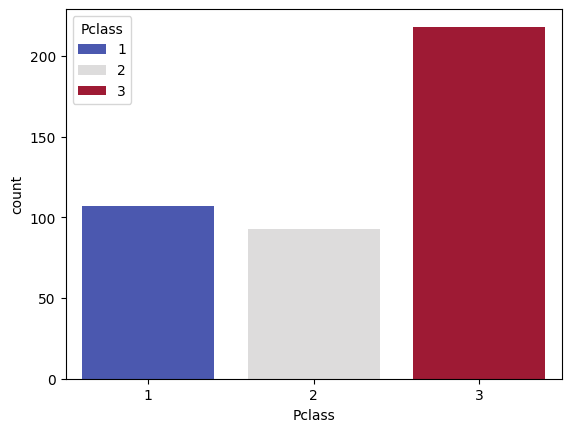

In [50]:
sns.countplot(x='Pclass',data= data,hue='Pclass',palette='coolwarm')

<Axes: xlabel='Pclass', ylabel='count'>

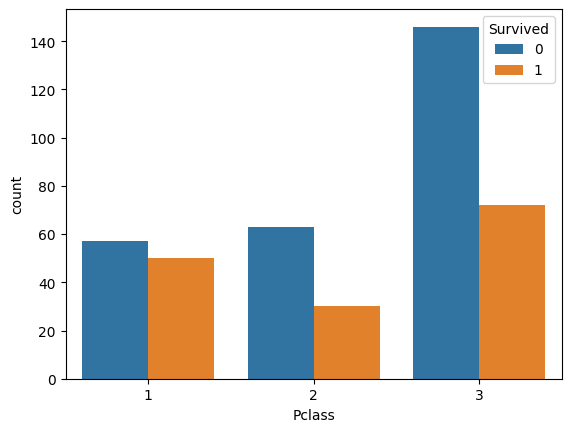

In [53]:
sns.countplot(x='Pclass',data= data,hue='Survived')

Conversion of Text Data to numerical Data

In [56]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0


Remove Unnecessary Columns

In [59]:
x= data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y= data['Survived']
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


Training And testing of Data

In [60]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)


In [63]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((334, 7), (84, 7), (334,), (84,))

In [64]:
model=LogisticRegression(max_iter=1000)

In [65]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Accuracy Score on Traiin  Data

In [69]:
x_train_prediction=model.predict(x_train)
x_train_prediction
train_data_accuracy=accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data : ',train_data_accuracy*100)

Accuracy score of training data :  100.0


In [71]:
x_test_prediction = model.predict(x_test)
x_test_prediction
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy*100)

Accuracy score of test data :  100.0


**Model Ready Ready to to take input parameters**

In [85]:
#make changes in below format for Prediction
new_data_point=pd.DataFrame({
    'Pclass':[1],
    'Sex':[1],
    'Age':[22],
    'SibSp':[1],
    'Parch':[0],
    'Fare':[31],
    'Embarked':[0]
})
print(new_data_point)
prediction = model.predict(new_data_point)

if(prediction[0]==0):
  print('Not Survived')
else:
  print('Survived')
# print(prediction[0])

   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0       1    1   22      1      0    31         0
Survived
